# Семинар 3: EDA и sklearn

На семинаре мы будем заниматься построением различных визуализаций. Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности, а затем научиться оценивать  модели на (пока что частично) обработанных данных.

Мы продолжим работать с данными о пассажирах Титаника.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Загрузим данные.

In [2]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

In [3]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


**Задание 1.** Выведите на экран размеры таблицы

In [4]:
Data.shape

(891, 12)

## Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [ ]:
np.nan

In [5]:
#your code here
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [6]:
Data.Sex.value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [7]:
#your code here
Data = Data[Data.Sex != 'unknown']

In [8]:
Data.Sex.value_counts()

male      574
female    312
Name: Sex, dtype: int64

In [9]:
Data.shape

(886, 12)

**Задание ***. Подумайте, можно ли как-то узнать пол пассажиров, которые отнесены к категории unknown?

In [ ]:
#your code here

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [12]:
#your code here
sex = Data['Sex'].copy()
sex[sex == 'male'] = 0
sex[sex == 'female'] = 1
Data['Sex'] = sex

Data.head()

<ipython-input-12-30ccc832c8bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Sex'] = sex


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,S


In [14]:
Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
Data['Sex'] = Data['Sex'].astype(int)

<ipython-input-15-cb3f98e20cc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Sex'] = Data['Sex'].astype(int)


In [16]:
Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Посмотрим, как влияет пол на выживаемость.

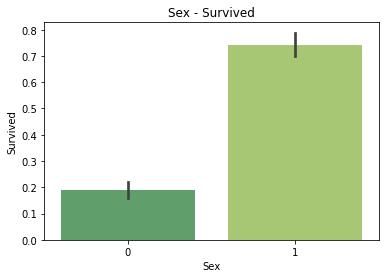

In [17]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

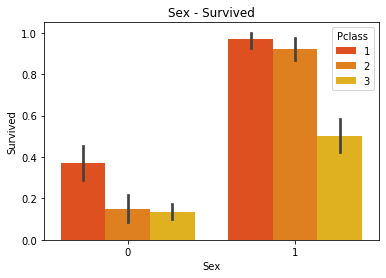

In [18]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


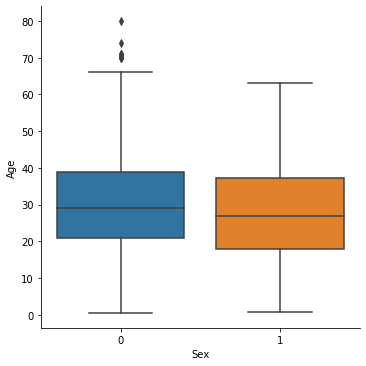

In [19]:
sns.factorplot(x="Sex", y="Age", data=Data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


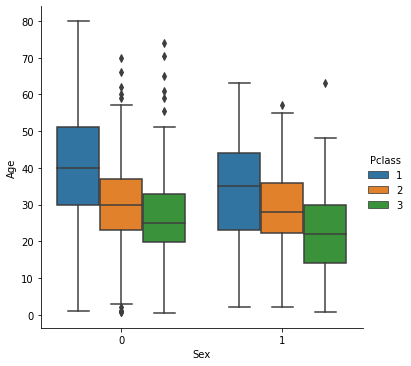

In [20]:
sns.factorplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [21]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

**Задание 6.** Удалим из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [22]:
Data.dropna(subset=['Embarked'], inplace=True)
Data.shape

<ipython-input-22-aa74ceced470>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.dropna(subset=['Embarked'], inplace=True)


(884, 12)

**Задание 7.** Закодируем столбец Embarked с помощью OneHot-кодирования (pd.get_dummies). 

In [24]:
Data = pd.get_dummies(Data, columns=['Embarked'], drop_first=True)
Data.head()

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [26]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,0,27.0,0,0,211536,13.0000,NaN,0,1
887,888,1,1,Graham; Miss. Margaret Edith,1,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,Behr; Mr. Karl Howell,0,26.0,0,0,111369,30.0000,C148,0,0


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [28]:
Data.Age.count()

709

In [29]:
884 - 709

175

In [30]:
175 / 884

0.19796380090497737

Заполним пропуски медианным значением Age.

In [31]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

In [32]:
Data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 884, dtype: float64

Нарисуем распределение возраста пассажиров.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


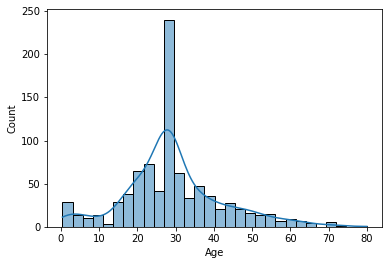

In [34]:
sns.histplot(Data['Age'], kde=True)
plt.show()

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [37]:
sum(Data.Fare.isna())

0

**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [38]:
Data['Pclass'].value_counts()

3    487
1    214
2    183
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте столбчатую диаграмму выживаемости в зависимости от Pclass.

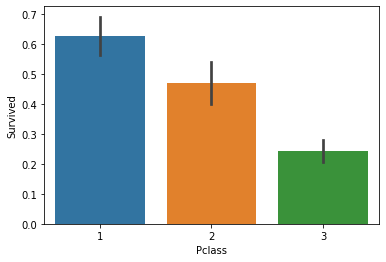

In [39]:
sns.barplot(x = 'Pclass', y = 'Survived', data = Data)

**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [40]:
Data['SibSp'].value_counts()

0    603
1    207
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [41]:
Data['Parch'].value_counts()

0    673
1    118
2     79
3      5
4      4
5      4
6      1
Name: Parch, dtype: int64

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [42]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,0,1


In [44]:
Data.drop("PassengerId", axis = 1, inplace = True)

In [45]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,0,0
2,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,0,1
4,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,0,1


# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [46]:
#your code here
NumericData = Data._get_numeric_data()
NumericData

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,1
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,28.0,1,2,23.4500,0,1
889,1,1,0,26.0,0,0,30.0000,0,0


In [48]:
NumericData.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.335506,0.543777,-0.067165,-0.032450,0.087297,0.256200,0.002703,-0.151664
Pclass,-0.335506,1.000000,-0.129810,-0.338843,0.081720,0.013969,-0.548094,0.217939,0.079008
Sex,0.543777,-0.129810,1.000000,-0.086858,0.116404,0.261302,0.181285,0.074009,-0.120986
Age,-0.067165,-0.338843,-0.086858,1.000000,-0.234719,-0.176253,0.093524,-0.030963,-0.007783
SibSp,-0.032450,0.081720,0.116404,-0.234719,1.000000,0.421809,0.160630,-0.023379,0.067719
Parch,0.087297,0.013969,0.261302,-0.176253,0.421809,1.000000,0.221926,-0.078248,0.056153
Fare,0.256200,-0.548094,0.181285,0.093524,0.160630,0.221926,1.000000,-0.114707,-0.165913
Embarked_Q,0.002703,0.217939,0.074009,-0.030963,-0.023379,-0.078248,-0.114707,1.000000,-0.494518
Embarked_S,-0.151664,0.079008,-0.120986,-0.007783,0.067719,0.056153,-0.165913,-0.494518,1.000000


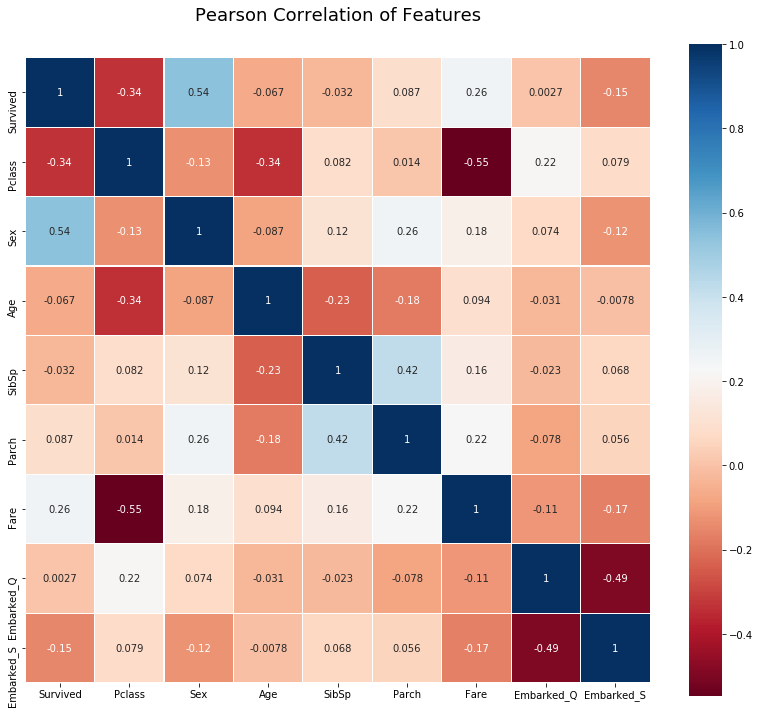

In [47]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


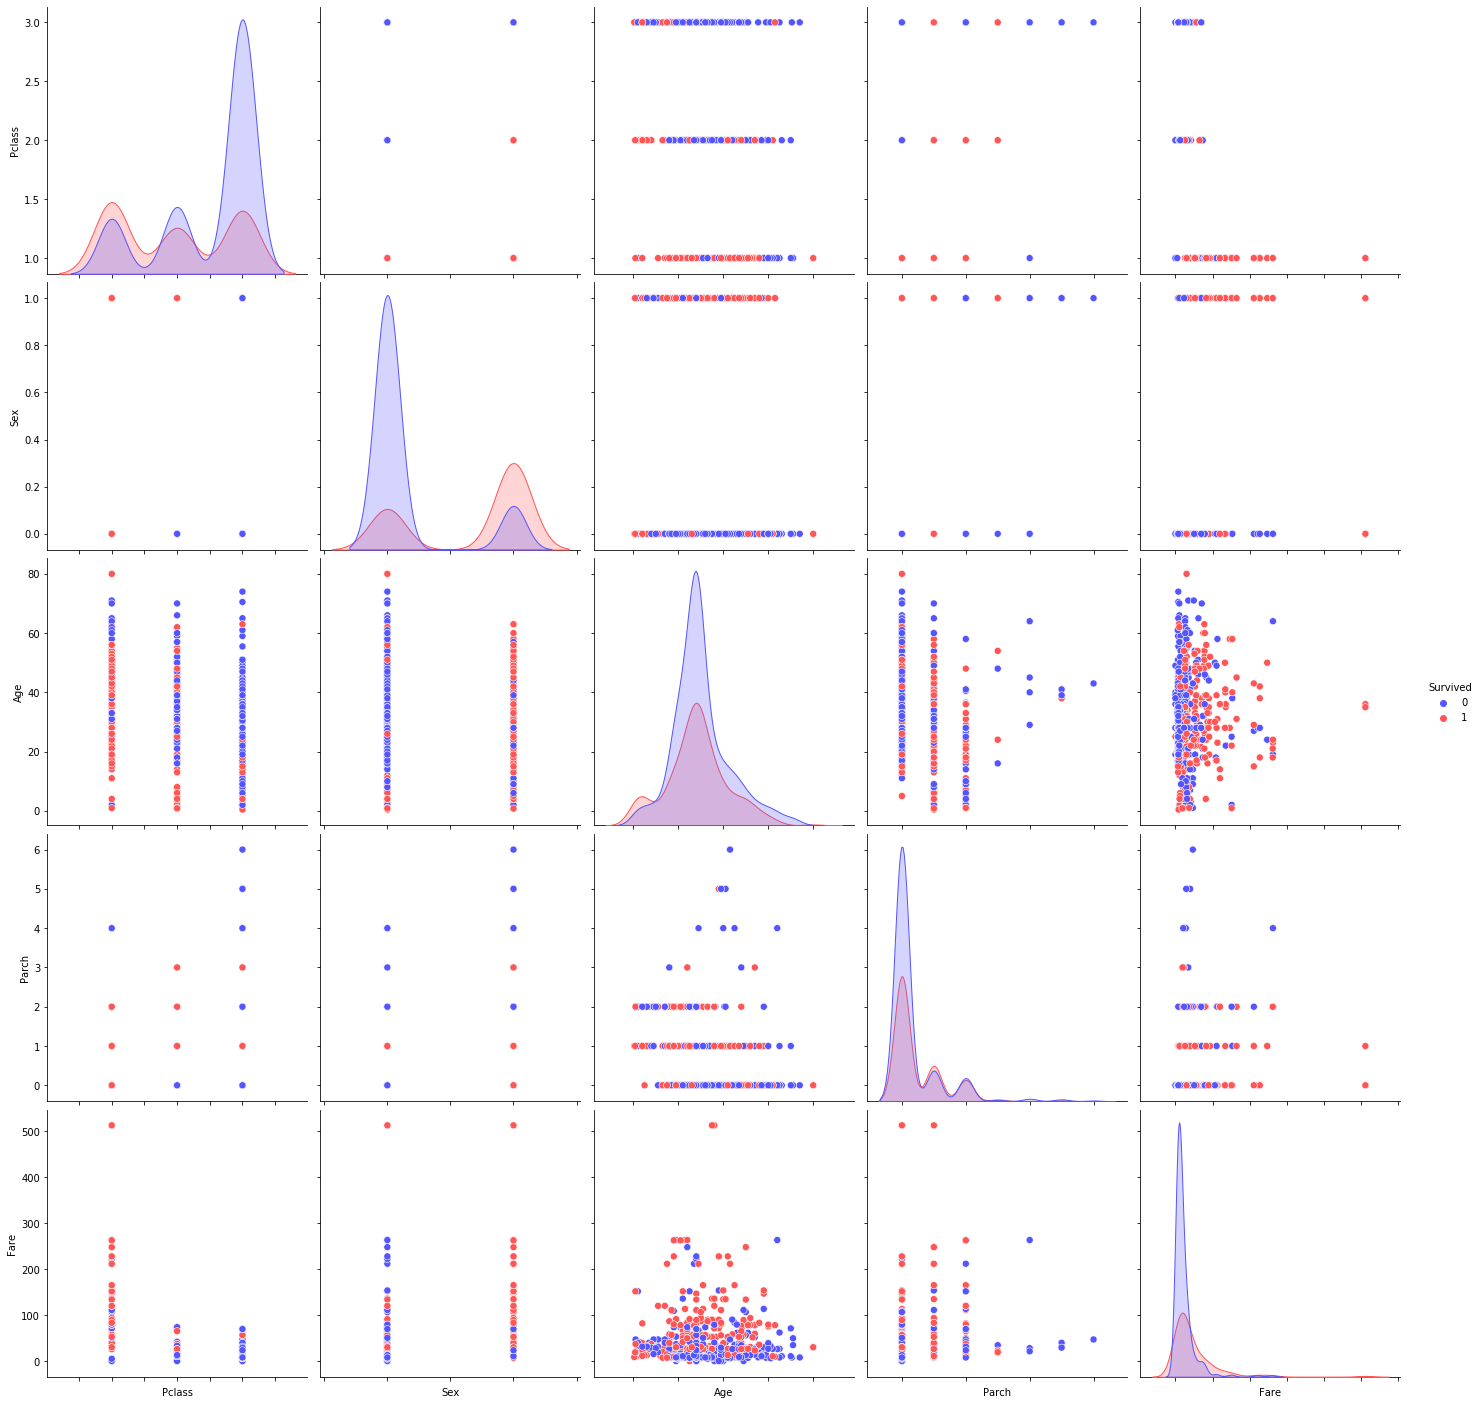

In [52]:
g = sns.pairplot(Data[['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare']\
                     ],
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde',
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [54]:
Data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 884, dtype: float64

In [53]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [55]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [ ]:
#your code here

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [57]:
#Your code here
Data['NameLen'] = Data['Name'].apply(len)

In [58]:
Data['NameLen']

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: NameLen, Length: 884, dtype: int64

**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

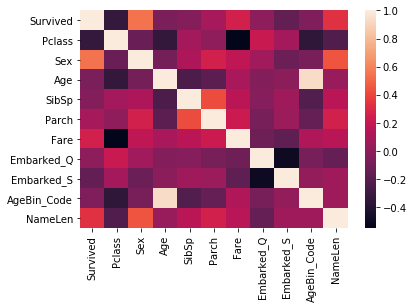

In [59]:
sns.heatmap(Data.corr())

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 14*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
#your code here

**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

## sklearn

In [60]:
from sklearn.linear_model import LinearRegression

In [63]:
y = Data['Fare']
X = Data._get_numeric_data()
# ВНИМАНИЕ: тут неверно!!
# Происходит утечка (в X содержится предсказываемая переменная)
# Поэтому все метрики внизу получились нереалистичными

In [66]:
X.drop('Pclass', axis = 1, inplace = True)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [70]:
X_train.shape

(618, 10)

In [71]:
X_test.shape

(266, 10)

In [73]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_model.predict(X_test)

array([6.97500000e+00, 7.75000000e+00, 1.45000000e+01, 1.52458000e+01,
       7.89580000e+00, 1.57417000e+01, 2.30000000e+01, 8.05000000e+00,
       3.96875000e+01, 2.55875000e+01, 2.10000000e+01, 2.23583000e+01,
       2.79000000e+01, 7.87920000e+00, 1.95000000e+01, 6.66000000e+01,
       2.59250000e+01, 6.49580000e+00, 2.41500000e+01, 1.06425000e+02,
       7.12500000e+00, 1.35633300e+02, 3.10000000e+01, 7.88750000e+00,
       7.22500000e+00, 1.30000000e+01, 3.85000000e+01, 1.87500000e+01,
       7.25000000e+00, 7.67292000e+01, 5.12329200e+02, 1.30000000e+01,
       8.05000000e+00, 1.30000000e+01, 1.57204978e-14, 4.69000000e+01,
       3.96875000e+01, 1.34500000e+02, 1.35633300e+02, 3.90000000e+01,
       1.30000000e+01, 2.77208000e+01, 1.30000000e+01, 7.75000000e+00,
       5.59000000e+01, 1.80000000e+01, 5.69292000e+01, 2.60000000e+01,
       5.64958000e+01, 7.25000000e+00, 8.05000000e+00, 2.60000000e+01,
       7.22500000e+00, 7.92000000e+01, 8.05000000e+00, 1.05000000e+01,
      

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [75]:
# Train
print('MSE: ', mean_squared_error(y_train, lin_model.predict(X_train)))
print('MAE: ', mean_absolute_error(y_train, lin_model.predict(X_train)))
print('R2: ', r2_score(y_train, lin_model.predict(X_train)))

MSE:  1.2820449811691335e-27
MAE:  2.67465255057457e-14
R2:  1.0


In [77]:
# Test
print('MSE: ', mean_squared_error(y_test, lin_model.predict(X_test)))
print('MAE: ', mean_absolute_error(y_test, lin_model.predict(X_test)))
print('R2: ', r2_score(y_test, lin_model.predict(X_test)))

MSE:  1.6027230060036512e-27
MAE:  2.8090144102265873e-14
R2:  1.0


In [79]:
np.polynomial.Polynomial()

TypeError: __init__() missing 1 required positional argument: 'coef'